In [4]:
import pandas as pd
import os
import gc  # Garbage collection module

# Load data

In [ ]:
import data_merging

# Directory where the CSV files are stored
spot_directory = 'SOLUSDT_spot'
future_directory = 'future_1s'

# Directory name where the CSV file will be saved
merged_directory = "merged_data"

# Create the directory if it does not exist
if not os.path.exists(merged_directory):
    os.makedirs(merged_directory)

spot_names = ["SOLUSDT"]
future_names = ["BTCUSDT", "INJUSDT", "SOLUSDT"]
years = [2023]
months = [3, 4, 5, 6, 7, 8, 9, 10, 11]

data_merging.read_and_merge_csv_files(spot_directory, future_directory, spot_names, future_names, years, months, merged_directory)

# Calculate Future-Spot Spread

In [57]:
import data_cleaning

merged_directory = "merged_data"
spot_names = ["SOLUSDT"]
future_names = ["BTCUSDT", "INJUSDT", "SOLUSDT"]
dumping_directory = "spread_data"

# spread_{spot}_{future}
spreads_SOL_SOL = data_cleaning.calculate_spread(merged_directory, "SOLUSDT", "SOLUSDT", dumping_directory)
spread_SOL_BTC = data_cleaning.calculate_spread(merged_directory, "SOLUSDT", "BTCUSDT", dumping_directory)
spread_SOL_INJ = data_cleaning.calculate_spread(merged_directory, "SOLUSDT", "INJUSDT", dumping_directory)

Processing: merged_data/SOLUSDT-BTCUSDT-2023-10.csv
Deleted: merged_data/SOLUSDT-BTCUSDT-2023-10.csv
Processing: merged_data/SOLUSDT-BTCUSDT-2023-04.csv
Deleted: merged_data/SOLUSDT-BTCUSDT-2023-04.csv
Processing: merged_data/SOLUSDT-BTCUSDT-2023-05.csv
Deleted: merged_data/SOLUSDT-BTCUSDT-2023-05.csv
Processing: merged_data/SOLUSDT-BTCUSDT-2023-11.csv
Deleted: merged_data/SOLUSDT-BTCUSDT-2023-11.csv
Processing: merged_data/SOLUSDT-BTCUSDT-2023-07.csv
Deleted: merged_data/SOLUSDT-BTCUSDT-2023-07.csv
Processing: merged_data/SOLUSDT-BTCUSDT-2023-06.csv
Deleted: merged_data/SOLUSDT-BTCUSDT-2023-06.csv
Processing: merged_data/SOLUSDT-BTCUSDT-2023-03.csv
Deleted: merged_data/SOLUSDT-BTCUSDT-2023-03.csv
Processing: merged_data/SOLUSDT-BTCUSDT-2023-08.csv
Deleted: merged_data/SOLUSDT-BTCUSDT-2023-08.csv
Processing: merged_data/SOLUSDT-BTCUSDT-2023-09.csv
Deleted: merged_data/SOLUSDT-BTCUSDT-2023-09.csv
Sorted: Spot SOLUSDT, Future BTCUSDT

Saved: spread_data/spreads_SOLUSDT_BTCUSDT.csv
Delete

# Visualization & Analysis

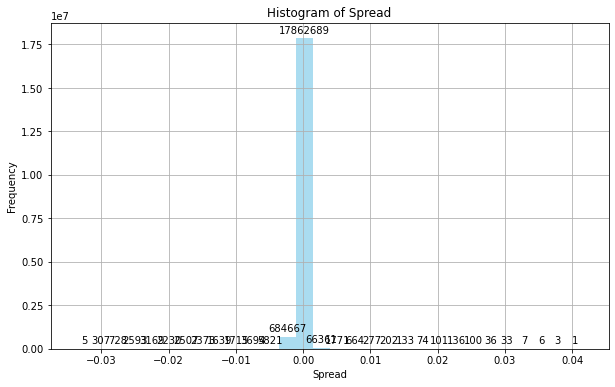

mean_duration: -0.00033952172898511177
median_duration: -0.00038503362701530004
std_deviation: 0.0008092236116098404
min_duration: -0.0337525329342092
max_duration: 0.0416145833958293
total_count: 18644042


In [1]:
# import data
import pandas as pd
import data_visualization

# Path to the directory containing the CSV files
merged_directory = 'spread_data'

# Reading each CSV file into a DataFrame
spreads_SOL_SOL_df = pd.read_csv(f'{merged_directory}/spreads_SOLUSDT_SOLUSDT.csv')
# spread_SOL_BTC_df = pd.read_csv(f'{merged_directory}/spread_SOL_BTC.csv')
# spread_SOL_INJ_df = pd.read_csv(f'{merged_directory}/spreads_SOLUSDT_INJUSDT.csv')

stats = data_visualization.calculate_spread_statistics(spreads_SOL_SOL_df)

# Count Holding Position based Arbitrage Oppotunities & Average Time

In [ ]:
import holding_position_analysis

# Path to the directory containing the CSV files
merged_directory = 'spread_data'

# Rolling means
mean_15mins = 15 * 60 # past 15 mins
mean_1h = 1 * 60 * 60 # past 1 hour
mean_6h = 6 * 60 * 60 # past 6 hour
mean_1day = 1 * 24 * 60 * 60 # past 1 days
mean_7days = 7 * 24 * 60 * 60 # past 7 days
mean_14day = 14 * 24 * 60 * 60 # past 14 days
# means_list = [(mean_15mins, "15m"), (mean_1h, "1h"), (mean_6h, "6h"), (mean_1day, "1d"), (mean_7days, "7d"), (mean_14day, "14d")]
# means_list = [(mean_1day, "1 day"), (mean_7days, "7 days"), (mean_14day, "14 days")]
means_list = [(mean_14day, "14 days")]

# Threshold
threshold = 0.002

def print_metrics(metrics):
    print("Backtest Metrics:")
    for key, value in metrics.items():
        print(f"{key}: {value}")

# SOL-SOL
spread_SOL_SOL_df = pd.read_csv(f'{merged_directory}/spreads_SOLUSDT_SOLUSDT.csv')

for mean in means_list:
    mean_n = mean[0]
    rolling_mean_window = mean[1]
    metrics = holding_position_analysis.backtest_arbitrage_strategy_hedging_ratio_version_rolling(mean_n, spread_SOL_SOL_df, threshold, rolling_mean_window)
    
    print_metrics(metrics)

del spread_SOL_SOL_df
gc.collect()

# Count Trading Signals based Arbitrage Oppotunities & Average Time

In [2]:
import trading_signal_analysis

# Path to the directory containing the CSV files
merged_directory = 'spread_data'

# Rolling means
mean_15mins = 15 * 60 # past 15 mins
mean_1h = 1 * 60 * 60 # past 1 hour
mean_6h = 6 * 60 * 60 # past 6 hour
mean_1day = 1 * 24 * 60 * 60 # past 1 days
mean_7days = 7 * 24 * 60 * 60 # past 7 days
mean_14day = 14 * 24 * 60 * 60 # past 14 days
means_list = [(mean_15mins, "15m"), (mean_1h, "1h"), (mean_6h, "6h"), (mean_1day, "1d"), (mean_7days, "7d"), (mean_14day, "14d")]
# means_list = [(mean_1day, "1 day"), (mean_7days, "7 days"), (mean_14day, "14 days")]

# Threshold
threshold = 0.002

def print_metrics(metrics):
    print("Backtest Metrics:")
    for key, value in metrics.items():
        print(f"{key}: {value}")

def check_create_directory(directory_path):
    """
    Checks if a specified directory exists, and if not, creates it.

    Parameters:
    - directory_path: The path of the directory to check and possibly create.
    """
    # Check if the directory exists
    if not os.path.exists(directory_path):
        # If it does not exist, create the directory
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' was created.")
    else:
        print(f"Directory '{directory_path}' already exists.")

Directory 'trading_signal_duration_data' already exists.


100%|██████████| 18644042/18644042 [00:15<00:00, 1206981.12it/s]


Directory 'trading_signal_duration_data' already exists.


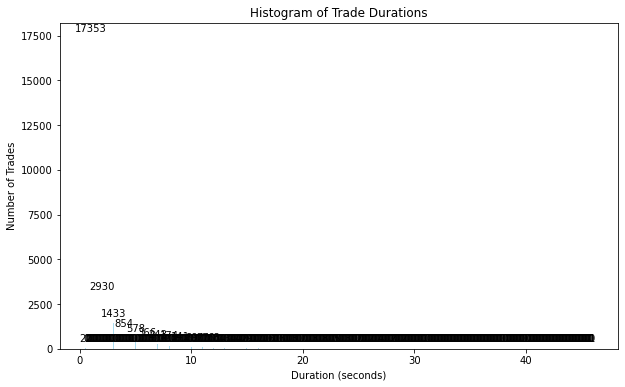

Backtest Metrics:
Rolling Mean Window: 15m
Spread Threshold: 0.002
Trade Count: 24547
Mean Duration (seconds): 1.9006803275349329
Median Duration (seconds): 1.0
Standard Deviation: 2.2589732137380025
Max Duration (seconds): 46.0
Min Duration (seconds): 0.5
Trades whithin 1 sec: 22
Trades in 1 sec: 17353
Trades in 2-5 secs: 5795
Trades within 10 secs: 24183


100%|██████████| 18644042/18644042 [00:16<00:00, 1100548.31it/s]


Directory 'trading_signal_duration_data' already exists.


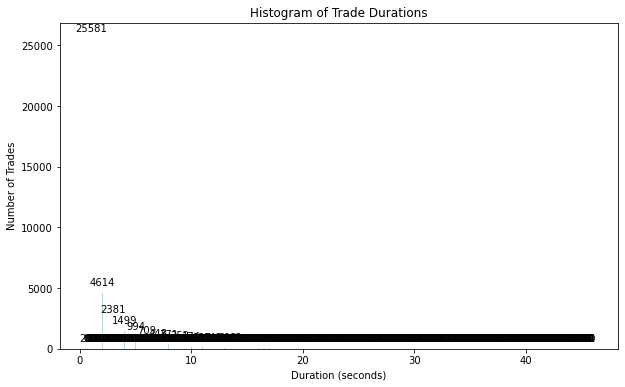

Backtest Metrics:
Rolling Mean Window: 1h
Spread Threshold: 0.002
Trade Count: 37755
Mean Duration (seconds): 2.056946099854324
Median Duration (seconds): 1.0
Standard Deviation: 2.470113055260654
Max Duration (seconds): 46.0
Min Duration (seconds): 0.5
Trades whithin 1 sec: 28
Trades in 1 sec: 25581
Trades in 2-5 secs: 9488
Trades within 10 secs: 37051


100%|██████████| 18644042/18644042 [00:18<00:00, 996953.28it/s] 


Directory 'trading_signal_duration_data' already exists.


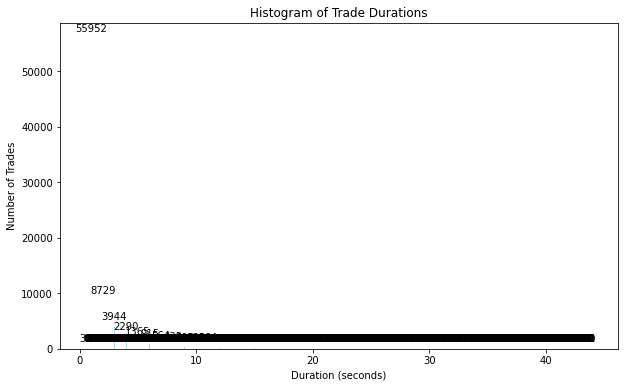

Backtest Metrics:
Rolling Mean Window: 6h
Spread Threshold: 0.002
Trade Count: 75502
Mean Duration (seconds): 1.7261529495907393
Median Duration (seconds): 1.0
Standard Deviation: 1.9607041905143585
Max Duration (seconds): 44.0
Min Duration (seconds): 0.5
Trades whithin 1 sec: 36
Trades in 1 sec: 55952
Trades in 2-5 secs: 16328
Trades within 10 secs: 74711


100%|██████████| 18644042/18644042 [00:25<00:00, 744165.27it/s] 


Directory 'trading_signal_duration_data' already exists.


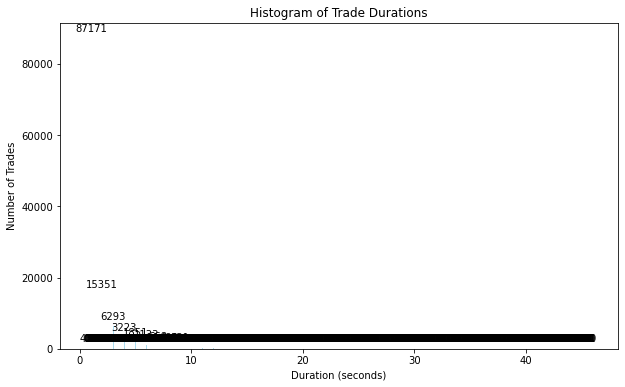

Backtest Metrics:
Rolling Mean Window: 1d
Spread Threshold: 0.002
Trade Count: 117637
Mean Duration (seconds): 1.6350935504985675
Median Duration (seconds): 1.0
Standard Deviation: 1.7290435659918728
Max Duration (seconds): 46.0
Min Duration (seconds): 0.5
Trades whithin 1 sec: 43
Trades in 1 sec: 87171
Trades in 2-5 secs: 26718
Trades within 10 secs: 116766


100%|██████████| 18644042/18644042 [00:16<00:00, 1150399.94it/s]


Directory 'trading_signal_duration_data' already exists.


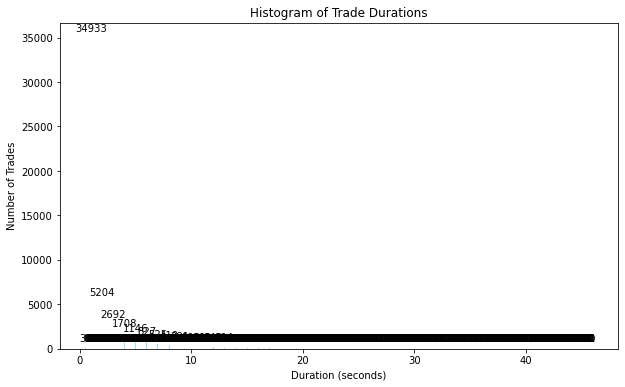

Backtest Metrics:
Rolling Mean Window: 7d
Spread Threshold: 0.002
Trade Count: 48793
Mean Duration (seconds): 1.944049351341381
Median Duration (seconds): 1.0
Standard Deviation: 2.391850496703543
Max Duration (seconds): 46.0
Min Duration (seconds): 0.5
Trades whithin 1 sec: 36
Trades in 1 sec: 34933
Trades in 2-5 secs: 10750
Trades within 10 secs: 47956


100%|██████████| 18644042/18644042 [00:15<00:00, 1173737.52it/s]


Directory 'trading_signal_duration_data' already exists.


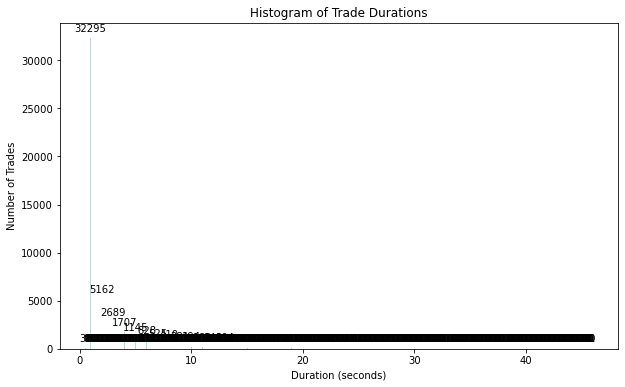

Backtest Metrics:
Rolling Mean Window: 14d
Spread Threshold: 0.002
Trade Count: 46111
Mean Duration (seconds): 1.9978530068747153
Median Duration (seconds): 1.0
Standard Deviation: 2.4494688811707563
Max Duration (seconds): 46.0
Min Duration (seconds): 0.5
Trades whithin 1 sec: 38
Trades in 1 sec: 32295
Trades in 2-5 secs: 10703
Trades within 10 secs: 45274


61560

In [5]:
# SOL-SOL
spreads_SOL_SOL_df = pd.read_csv(f'{merged_directory}/spreads_SOLUSDT_SOLUSDT.csv')

# Specify the directory path
dump_file_directory = 'trading_signal_duration_data'

# Call the function with the specified directory
check_create_directory(dump_file_directory)

for mean in means_list:
    mean_n = mean[0]
    rolling_mean_window = mean[1]
    metrics = trading_signal_analysis.modified_optimized_backtest_arbitrage_strategy(mean_n, spreads_SOL_SOL_df, threshold, rolling_mean_window, dump_file_directory)
    
    print_metrics(metrics)

del spreads_SOL_SOL_df
gc.collect()

Explanation example:

2023-03-01-08:10:00 --> Below upper bond
2023-03-01-08:10:01 --> [Upper bond)
2023-03-01-08:10:02 --> Below upper bond
--> within 1 sec

2023-03-01-08:10:00 --> Below upper bond
2023-03-01-08:10:01 --> [Upper bond)
2023-03-01-08:10:02 --> [Upper upper bond)
2023-03-01-08:10:03 --> Below upper bond
--> 1 sec

In [6]:
import data_visualization

# Path to the signal durations file
file_path_15m = 'trading_signal_duration_data/signal_durations_15m.csv'
file_path_1h = 'trading_signal_duration_data/signal_durations_1h.csv'
file_path_6h = 'trading_signal_duration_data/signal_durations_6h.csv'
file_path_1d = 'trading_signal_duration_data/signal_durations_1d.csv'
file_path_7d = 'trading_signal_duration_data/signal_durations_7d.csv'
file_path_14d = 'trading_signal_duration_data/signal_durations_14d.csv'

label_15m = '15m Rolling Mean'
label_1h = '1h Rolling Mean'
label_6h = '6h Rolling Mean'
label_1d = '1d Rolling Mean'
label_7d = '7d Rolling Mean'
label_14d = '14d Rolling Mean'

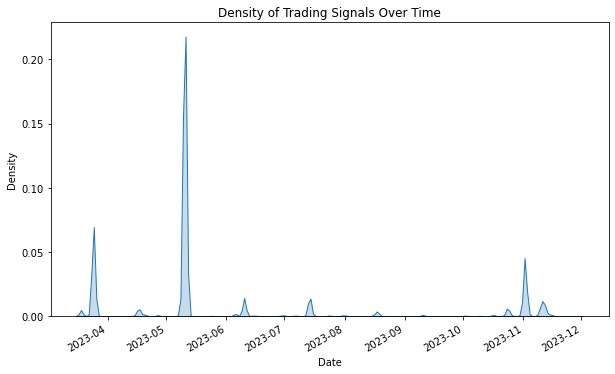

In [9]:
# Analyze the density of trading signals for the entire dataset
data_visualization.analyze_signal_density_by_date(file_path_14d)

# data_visualization.analyze_signal_density_by_date(file_path, time_frame)

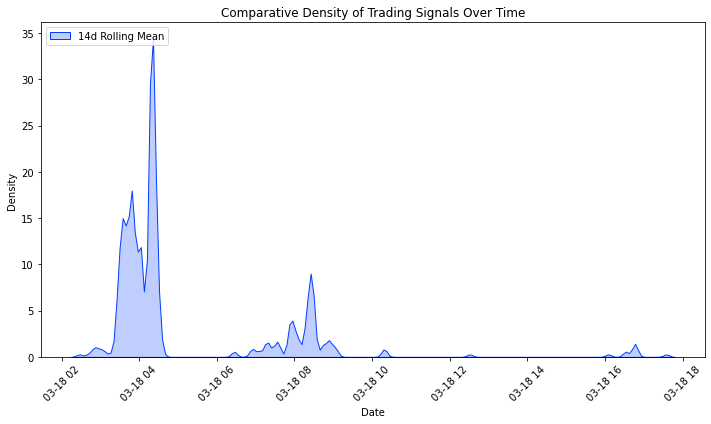

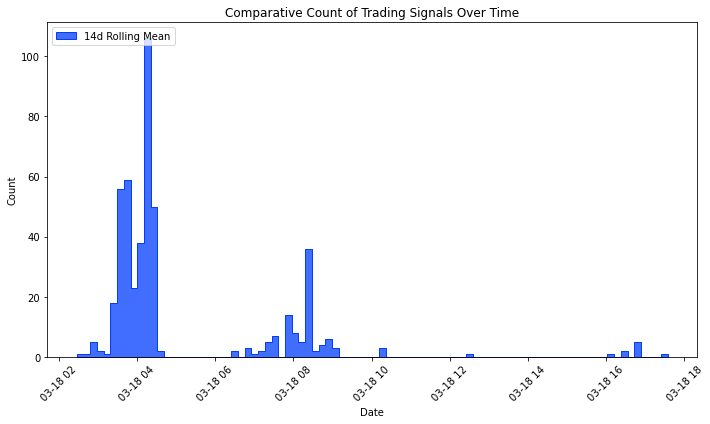

In [10]:
# input_files = [file_path_15m, file_path_1h, file_path_6h, file_path_1d, file_path_7d, file_path_14d]
# labels = [label_15m, label_1h, label_6h, label_1d, label_7d, label_14d]

input_files = [file_path_14d]
labels = [label_14d]

time_frame = ('2023-03-18', '2023-03-19')
# time_frame = ('2023-03-01', '2023-05-30')

data_visualization.compare_signal_density_by_date(input_files, labels, time_frame=time_frame, plot_type='density')
data_visualization.compare_signal_density_by_date(input_files, labels, time_frame=time_frame, plot_type='count')

# Ms Aggreated Data Visualization